In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# New Section

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!ls ~/.kaggle

kaggle.json


In [8]:
!kaggle datasets download -d alfanme/indonesian-batik-motifs-corak-app

Dataset URL: https://www.kaggle.com/datasets/alfanme/indonesian-batik-motifs-corak-app
License(s): CC0-1.0
 89% 139M/156M [00:01<00:00, 118MB/s]
100% 156M/156M [00:01<00:00, 106MB/s]


In [10]:
import zipfile
zip_file = zipfile.ZipFile('/content/indonesian-batik-motifs-corak-app.zip')
zip_file.extractall('/tmp/')

In [19]:
#import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
#training generator
train_generator = ImageDataGenerator(rescale=1/255,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     rotation_range=60,
                                     zoom_range=0.3,
                                     fill_mode='nearest')

In [27]:
#training data generator
train_data = train_generator.flow_from_directory('/tmp/DATASETv7/TRAIN',
                                                 target_size=(224,224),
                                                 batch_size=105,
                                                 class_mode='categorical',)

Found 1050 images belonging to 15 classes.


In [28]:
#membuat data validasi
val_generator = ImageDataGenerator(rescale=1/255)

val_data = val_generator.flow_from_directory('/tmp/DATASETv7/TEST',
                                             target_size=(224,224),
                                             class_mode='categorical',
                                             batch_size=30,)

Found 300 images belonging to 15 classes.


In [29]:
#kontruksi model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(3,3),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(15, activation='softmax'),
])

In [30]:
#compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(train_data,
                    steps_per_epoch=10,
                    epochs=50,
                    validation_data=val_data,
                    validation_steps=10,
                    verbose=2)

Epoch 1/50
10/10 - 66s - loss: 2.8994 - accuracy: 0.0848 - val_loss: 2.6737 - val_accuracy: 0.1333 - 66s/epoch - 7s/step
Epoch 2/50
10/10 - 53s - loss: 2.6357 - accuracy: 0.1505 - val_loss: 2.5831 - val_accuracy: 0.1467 - 53s/epoch - 5s/step
Epoch 3/50
10/10 - 52s - loss: 2.5459 - accuracy: 0.1571 - val_loss: 2.5593 - val_accuracy: 0.1567 - 52s/epoch - 5s/step
Epoch 4/50
10/10 - 53s - loss: 2.4790 - accuracy: 0.1952 - val_loss: 2.5604 - val_accuracy: 0.1767 - 53s/epoch - 5s/step
Epoch 5/50
10/10 - 53s - loss: 2.4260 - accuracy: 0.2276 - val_loss: 2.4731 - val_accuracy: 0.2133 - 53s/epoch - 5s/step
Epoch 6/50
10/10 - 52s - loss: 2.3636 - accuracy: 0.2229 - val_loss: 2.4929 - val_accuracy: 0.1967 - 52s/epoch - 5s/step
Epoch 7/50
10/10 - 53s - loss: 2.3333 - accuracy: 0.2438 - val_loss: 2.5089 - val_accuracy: 0.1833 - 53s/epoch - 5s/step
Epoch 8/50
10/10 - 53s - loss: 2.2872 - accuracy: 0.2657 - val_loss: 2.4712 - val_accuracy: 0.2133 - 53s/epoch - 5s/step
Epoch 9/50
10/10 - 53s - loss: 2

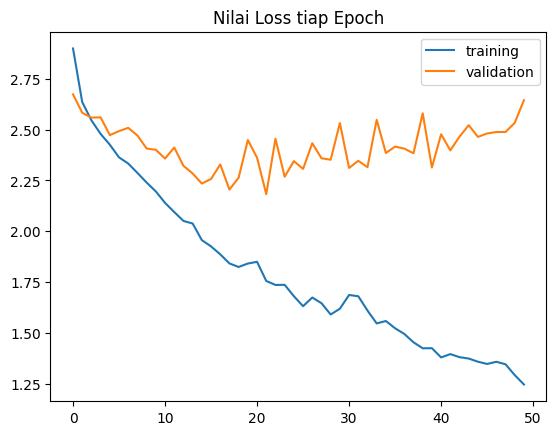

In [33]:
#perubahan nilai loss akurasi
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Nilai Loss tiap Epoch')
plt.legend(['training', 'validation'], loc= 'upper right')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')